In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import os, sys, glob

# display animations as html5 videos
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')

# load cellshapy (autoreload only for development)
%load_ext autoreload
%autoreload 2
import cellshapy

Loading config file from  /home/debacwa/.config/cellshapy


In [3]:
from cellshapy.config import config
print(config['contours']['n_points'])
print(config['contours']['smoothing'])

200
100


# Generate / import data

## Load from image files

In [8]:
data_glob = '../data/ellipses/*.tif' 

In [9]:
videos = cellshapy.VideoCollection.from_glob(data_glob, composite=True)

Creating VideoCollection from glob expression ../data/ellipses/*.tif: 20 video files or directories
Creating VideoCollection from list of paths. 20 video files or directories


## Generate continuous ellipses

In [3]:
import numpy as np
def generate_ellipse_morph_continuous(width=20, start_height=20, stop_height=40, n_frames=10):

    import numpy as np
    from matplotlib.patches import Ellipse
    # generate growing ellipse patches
    ellipse_patch = [Ellipse(xy=(0,0), width=width, height=h, angle=0) for h in np.linspace(start_height, stop_height, n_frames)]

    # extract vertices from patches
    ellipses = []
    for e in ellipse_patch:
        # get path from
        t = e.get_patch_transform()
        p = e.get_path().cleaned(transform=t)
        v = p.vertices[:-2]
        ellipses.append(v)
    ellipses = np.array(ellipses)
    return ellipses

morphs = [generate_ellipse_morph_continuous(width=w, start_height=w, stop_height=w*3) for w in [10,50,100,150]]

In [4]:
videos = cellshapy.VideoCollection.from_contours(morphs)

## Generate discretized ellipses

In [4]:
import numpy as np
def generate_ellipse_morph_discrete(imsize=(200,200), width=20, start_height=20, stop_height=40, n_frames=10):

    import numpy as np
    from skimage.draw import ellipse

    def draw_ellipse(w,h):
        im = np.zeros(imsize, dtype=np.uint8)
        center=im.shape[0]//2,im.shape[1]//2
        rr, cc = ellipse(center[0],center[1],h,w)
        im[rr,cc]=255
        return im
    
    ims = np.array([draw_ellipse(width,h) for h in np.linspace(start_height, stop_height, n_frames)])
    return ims

morphs = np.array([generate_ellipse_morph_discrete(imsize=(1024,1024), width=w, start_height=w, stop_height=w*2, n_frames=10) for w in [50,150]])

In [5]:
morphs.shape

(2, 10, 1024, 1024)

In [6]:
videos = cellshapy.VideoCollection.from_arrays(morphs)

Creating VideoCollection from list of 2 arrays. video files or directories


----

Iteration 1, error: 0.000002, time: 0.09 sec
20 contours aligned in 0.22 sec


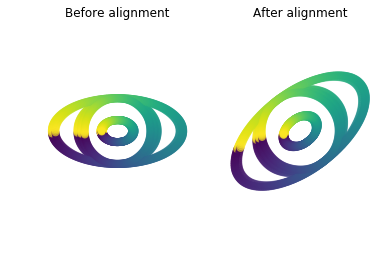

In [7]:
_ = videos.align_contours(show_samples=10)

({'area': 141966.73665578122,
  'perimeter': 1455.8618555758935,
  'perimeter to area ratio': 0.010254950489605463,
  'area bbox': 180323.37922631856,
  'perimeter bbox': 1801.5366701765,
  'max caliper diameter': 600.4592125985772,
  'min caliper diameter': 300.30912248967275,
  'aspect ratio': 1.999470437729464,
  'area hull': 141966.73665578122,
  'perimeter hull': 1455.861855575893,
  'solidity': 1.0,
  'waviness': 0.9999999999999997,
  'equivalent diameter': 425.1560456434127,
  'circularity': 0.8416976771532094,
  'inscribing circle diameter': 300.17971872887966,
  'major axis length': 600.7952393655291,
  'minor axis length': 300.8642584581199,
  'eccentricity': 0.8655765101259318,
  'elongation': 0.9968980045938607,
  'mean curvature': 0.004370746837341932},
 {'solidity': False,
  'waviness': False,
  'circularity': False,
  'eccentricity': False,
  'max caliper diameter': True,
  'elongation': True,
  'area hull': True,
  'perimeter bbox': True,
  'mean curvature': True,
  'ma

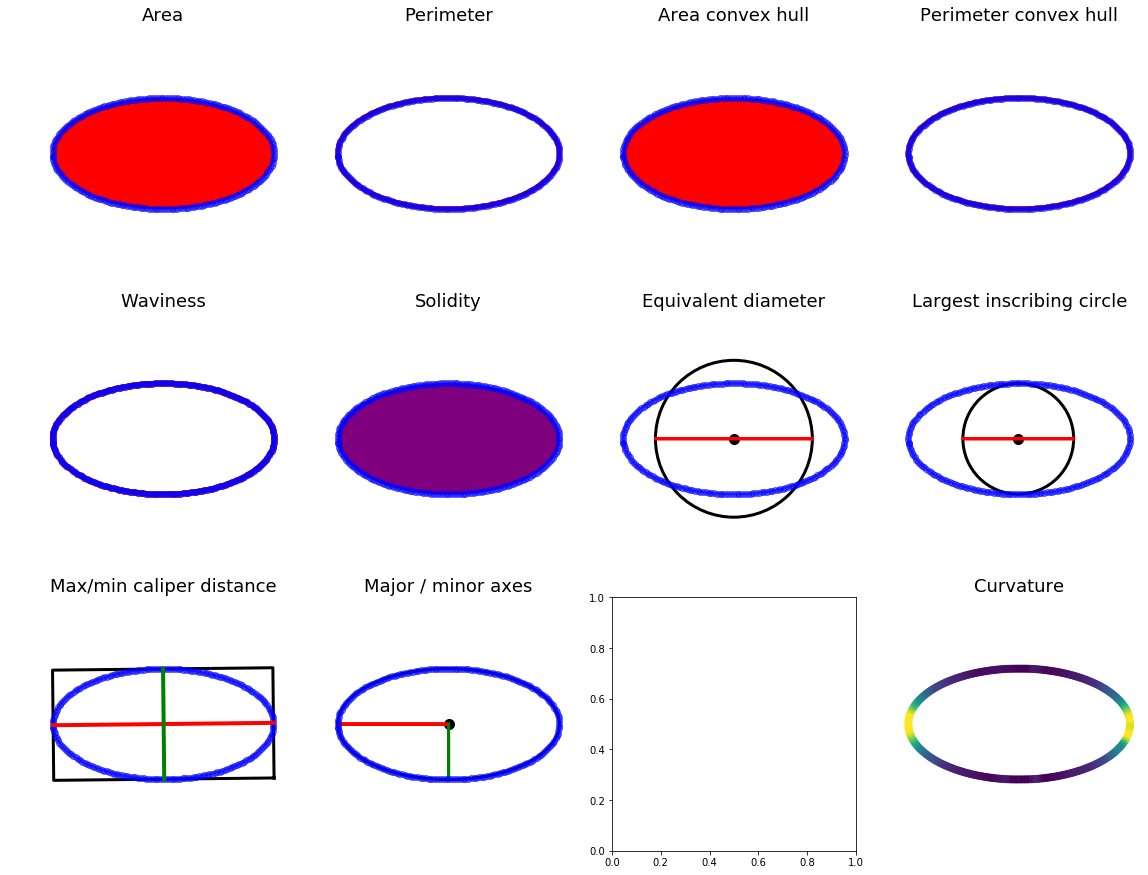

In [8]:
videos[-1][-1].extract_features(skeleton=False, plot=True)

In [9]:
videos[0].get_features()['mean curvature']

0    0.020010
1    0.018820
2    0.017908
3    0.017106
4    0.016403
5    0.015484
6    0.014763
7    0.014228
8    0.013705
9    0.013123
Name: mean curvature, dtype: float64

# Shape embedding

In [10]:
videos.embed_frames(source='all', method='pca', n_components=2)

`pca` embedding for `features`reset `solidity` to mean-subtracted, not standardized
reset `waviness` to mean-subtracted, not standardized
reset `circularity` to mean-subtracted, not standardized
reset `eccentricity` to mean-subtracted, not standardized
 done (0.16 s).
`pca` embedding for `contours` done (0.01 s).



(10, 2)
(10, 2)
(10, 2)


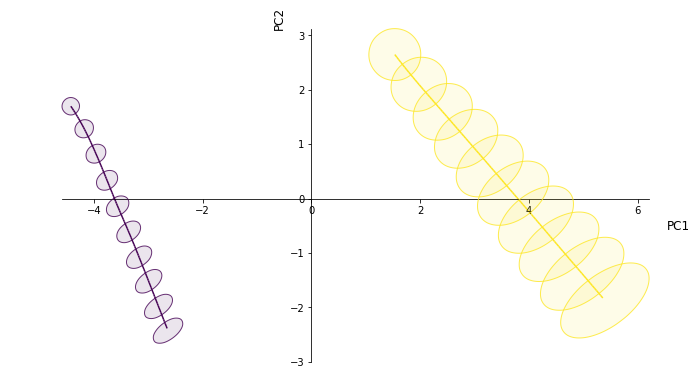

In [11]:
_ = videos.shape_space('features', 'pca', colorcode='video', shape_size=5, 
                   show_shapes=True, show_trajectories=True,
                   alpha_face=.1, alpha_edge=.8)


(10, 2)
(10, 2)
(10, 2)


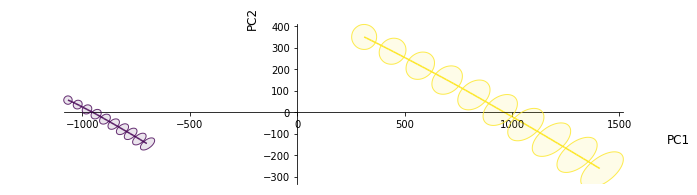

In [12]:
_ = videos.shape_space('contours', 'pca', colorcode='video', shape_size=5, 
                   show_shapes=True, show_trajectories=True,
                   alpha_face=.1, alpha_edge=.8, figsize=(10,20))

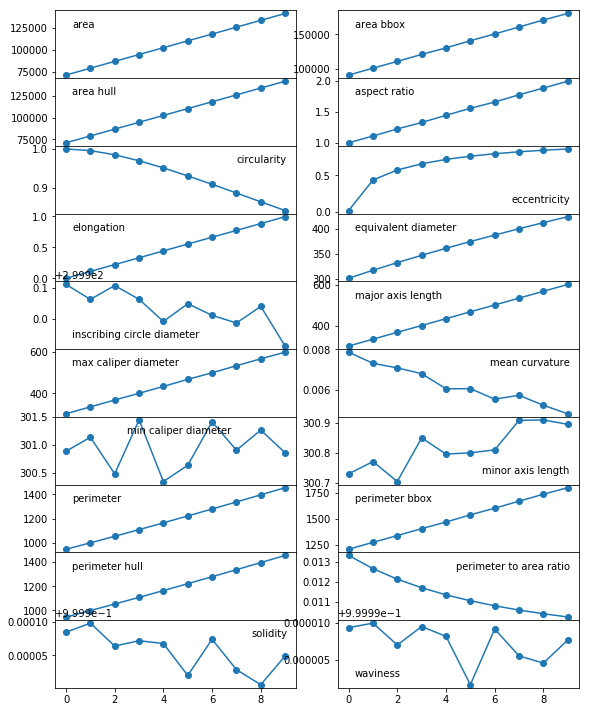

In [14]:
v = videos[-1]
_ = v.plot_timeseries_features()